En este archivo haremos un análisis exploratorio preliminar de los viajes de los "High Volume For-Hire Vehicle (HVFHV)" para el __primer semestre__ del año __2021__. Esta categoría empezó a aplicarse en Febrero de 2019 en NYC a vehículos con más de 10000 viajes por día.

In [1]:
import modin.pandas as pd
from distributed import Client
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Inicializa un cliente Dask para la ejecución distribuida en múltiples núcleos
client = Client(memory_limit='8GB')

In [2]:
tlc_21_01 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-01.parquet")
tlc_21_02 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-02.parquet")
tlc_21_03 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-03.parquet")
tlc_21_04 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-04.parquet")
tlc_21_05 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-05.parquet")
tlc_21_06 = pd.read_parquet("../raw_data/fhvhv_tripdata_2021-06.parquet")

In [3]:
# Todos los dataframes del primer semestre de 2021.
tlc_21_S1 = [tlc_21_01, tlc_21_02, tlc_21_03, tlc_21_04, tlc_21_05, tlc_21_06]

## Estructura general

In [4]:
tlc_21_01.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

Hay 24 columnas:
* 4 de tipo datetime.
* 9 de tipo float.
* 3 de tipo int.
* 8 de tipo object.

In [5]:
for df in tlc_21_S1:
    print(f"Filas: {df.shape[0]}")

Filas: 11908468
Filas: 11613942
Filas: 14227393
Filas: 14111371
Filas: 14719171
Filas: 14961892


In [6]:
tlc_21_01.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02682,B02682,2021-01-01 00:28:09,2021-01-01 00:31:42,2021-01-01 00:33:44,2021-01-01 00:49:07,230,166,5.26,923,1.98,2.75,NaN,0.00,14.99,N,N,,N,N
1,HV0003,B02682,B02682,2021-01-01 00:45:56,2021-01-01 00:55:19,2021-01-01 00:55:19,2021-01-01 01:18:21,152,167,3.65,1382,1.63,0.00,NaN,0.00,17.06,N,N,,N,N
2,HV0003,B02764,B02764,2021-01-01 00:21:15,2021-01-01 00:22:41,2021-01-01 00:23:56,2021-01-01 00:38:05,233,142,3.51,849,1.25,2.75,NaN,0.94,12.98,N,N,,N,N
3,HV0003,B02764,B02764,2021-01-01 00:39:12,2021-01-01 00:42:37,2021-01-01 00:42:51,2021-01-01 00:45:50,142,143,0.74,179,0.70,2.75,NaN,0.00,7.41,N,N,,N,N
4,HV0003,B02764,B02764,2021-01-01 00:46:11,2021-01-01 00:47:17,2021-01-01 00:48:14,2021-01-01 01:08:42,143,78,9.20,1228,2.41,2.75,NaN,0.00,22.44,N,N,,N,N


## Duplicados

Vamos a analizar la presencia de duplicados. Al haber tantas columnas, vamos a elegir un subset representativo. En caso de encontrar duplicados aplicaremos distintas estrategias.

In [7]:
#tlc_21_01.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

69

Hay 69 duplicados en este subset. Evaluemoslo en el conjunto de todas las columnas.

In [4]:
#tlc_21_01.duplicated().sum()

26

Hay 26 duplicados en enero de 2021.

In [4]:
#tlc_21_02.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

1

Hay 1 duplicado en este subset. Veamoslo en el conjunto de las columnas.

In [4]:
#tlc_21_02[tlc_21_02.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                                       "PULocationID", "DOLocationID", "trip_miles"], 
#                                       keep=False)]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
7572776,HV0003,B02882,B02882,2021-02-19 20:37:30,2021-02-19 20:44:03,2021-02-19 20:45:39,2021-02-19 20:52:02,247,42,1.2,383,0.98,0.0,NaN,0.0,5.39,N,N,,N,N
7582773,HV0003,B02875,B02875,2021-02-19 20:41:52,2021-02-19 20:45:08,2021-02-19 20:45:39,2021-02-19 20:52:02,247,42,1.2,383,0.75,0.0,NaN,0.0,5.93,N,N,,N,N


Vemos que difieren en request_datetime por lo que no son duplicados.

In [4]:
#tlc_21_03.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

0

In [4]:
#tlc_21_04.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

77

Hay 77 duplicados en este subset. Vamos a analizarlo en todo el conjunto de columnas.

In [4]:
#tlc_21_04.duplicated().sum()

25

Hay 25 duplicados en abril de 2021.

In [4]:
#tlc_21_05.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

510

Hay 510 en este subset, vamos a analizar el conjunto completo.

In [4]:
#tlc_21_05.duplicated().sum()

510

Hay efectivamente 510 duplicados en mayo de 2021.

In [4]:
#tlc_21_06.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

0

## hvfhs_license_num

In [4]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.hvfhs_license_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [5]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{df.hvfhs_license_num.unique()}")

Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']


In [6]:
for df in tlc_21_S1:
    print(df.hvfhs_license_num.value_counts(normalize=True), "\n")

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


hvfhs_license_num
HV0003    0.730919
HV0005    0.259842
HV0004    0.009238
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.713863
HV0005    0.278731
HV0004    0.007406
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.715056
HV0005    0.277402
HV0004    0.007543
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.725541
HV0005    0.267081
HV0004    0.007378
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.734309
HV0005    0.259147
HV0004    0.006544
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.718318
HV0005    0.276079
HV0004    0.005604
Name: proportion, dtype: float64 



Entre el 71-73% de las licencias corresponden a HV0003 (Uber) entre el 25-27% de las licencias corresponden a HV0005 (Lyft) y menos del 1% corresponden a HV0004 (Via).

## dispatching_base_num

In [7]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.dispatching_base_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [8]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{sorted(df.dispatching_base_num.unique())}")

Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B0

Cada base está asociada con una compañía distinta.

## originating_base_num

In [9]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.originating_base_num.isna().mean()}")

Promedio de nulos por mes: 0.2692268224594465
Promedio de nulos por mes: 0.2857885806559048
Promedio de nulos por mes: 0.28488037126689336
Promedio de nulos por mes: 0.27418228887894736
Promedio de nulos por mes: 0.2654380467486926
Promedio de nulos por mes: 0.2814118027319005


Hay un promedio de 26-28% de valores faltantes en esta columna.

In [10]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{df.originating_base_num.unique()}")

Los valores únicos por mes: ['B02682' 'B02764' None 'B02875' 'B02835' 'B02836' 'B02512' 'B02872'
 'B02888' 'B02617' 'B02864' 'B02877' 'B02889' 'B02876' 'B02765' 'B02395'
 'B02871' 'B02869' 'B02866' 'B02867' 'B02884' 'B02879' 'B02878' 'B02882'
 'B02865' 'B02883' 'B02880' 'B02887' 'B02870' 'B02510' 'B02800' 'B03136'
 'B02826' 'B02729' 'B00457' 'B02026' 'B03153' 'B00446' 'B00692' 'B00887']
Los valores únicos por mes: ['B02764' None 'B02872' 'B02888' 'B02883' 'B02867' 'B02864' 'B02835'
 'B02869' 'B02878' 'B02836' 'B02617' 'B02879' 'B02765' 'B02870' 'B02866'
 'B02884' 'B02887' 'B02512' 'B02877' 'B02682' 'B02875' 'B02395' 'B02876'
 'B02871' 'B02882' 'B02889' 'B02880' 'B02865' 'B02510' 'B02729' 'B00446'
 'B00457' 'B00887' 'B02800' 'B02026' 'B03136' 'B03153' 'B02826']
Los valores únicos por mes: ['B02764' 'B02835' 'B02872' 'B02617' None 'B02883' 'B02875' 'B02867'
 'B02864' 'B02876' 'B02765' 'B02866' 'B02882' 'B02869' 'B02887' 'B02879'
 'B02877' 'B02871' 'B02682' 'B02865' 'B02836' 'B02878' 'B02

## request_datetime

In [11]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.request_datetime.isna().mean()}")

Promedio de nulos por mes: 3.3589543172135997e-07
Promedio de nulos por mes: 8.610340916116165e-08
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


El promedio de nulos es muy bajo.

In [12]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.request_datetime.describe()}\n")

La descripción de cada mes es: count                         11908464
mean     2021-01-17 03:19:39.014394880
min                2020-12-31 23:35:24
25%      2021-01-09 12:30:22.750000128
50%                2021-01-17 01:34:32
75%                2021-01-24 19:03:31
max                2021-02-01 00:10:00
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         11613941
mean     2021-02-15 14:46:09.225104640
min                2021-01-31 23:17:44
25%                2021-02-08 17:36:14
50%                2021-02-15 11:29:22
75%                2021-02-22 12:11:59
max                2021-03-01 00:10:00
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         14227393
mean     2021-03-16 17:58:55.593635072
min                2021-02-05 10:06:34
25%                2021-03-09 06:28:40
50%                2021-03-16 22:12:27
75%                2021-03-24 11:01:17
max                2021-04-01 00:00:00
Name: requ

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## on_scene_datetime

In [13]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.on_scene_datetime.isna().mean()}")

Promedio de nulos por mes: 0.26871760498495695
Promedio de nulos por mes: 0.285761458082019
Promedio de nulos por mes: 0.2845346297807336
Promedio de nulos por mes: 0.27406408633151236
Promedio de nulos por mes: 0.2653595776555623
Promedio de nulos por mes: 0.2813493106353127


Hay un promedio de 26-28% de valores faltantes en esta columna.

In [14]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.on_scene_datetime.describe()}\n")

La descripción de cada mes es: count                          8708453
mean     2021-01-17 03:39:28.500086784
min                2020-12-31 23:49:22
25%                2021-01-09 13:05:05
50%                2021-01-17 00:54:21
75%                2021-01-24 19:26:20
max                2021-01-31 23:59:44
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                          8295125
mean     2021-02-15 14:17:16.418607104
min                2021-01-31 23:55:54
25%                2021-02-08 17:05:38
50%                2021-02-15 09:16:49
75%                2021-02-22 13:15:22
max                2021-03-01 00:00:56
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                         10179207
mean     2021-03-16 14:25:05.806439424
min                2021-02-28 23:54:41
25%         2021-03-08 21:16:52.500000
50%                2021-03-16 17:55:09
75%                2021-03-24 07:23:10
max                2021-03-31 23:59:53
Name: on

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## pickup_datetime

In [15]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.pickup_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [16]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.pickup_datetime.describe()}\n")

La descripción de cada mes es: count                         11908468
mean     2021-01-17 03:23:57.029842688
min                2021-01-01 00:00:00
25%                2021-01-09 12:34:14
50%                2021-01-17 01:39:42
75%                2021-01-24 19:07:45
max                2021-01-31 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         11613942
mean     2021-02-15 14:51:36.433117440
min                2021-02-01 00:00:00
25%      2021-02-08 17:42:09.249999872
50%                2021-02-15 11:33:19
75%                2021-02-22 12:16:01
max                2021-02-28 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         14227393
mean     2021-03-16 18:04:20.842638336
min                2021-03-01 00:00:00
25%                2021-03-09 06:32:47
50%                2021-03-16 22:17:44
75%                2021-03-24 11:05:17
max                2021-03-31 23:59:59
Name: pickup

No se observan outliers ni superposiciones entre los meses.

## dropoff_datetime

In [17]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.dropoff_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [18]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.dropoff_datetime.describe()}\n")

La descripción de cada mes es: count                         11908468
mean     2021-01-17 03:39:51.314891520
min                2021-01-01 00:02:42
25%                2021-01-09 12:49:59
50%                2021-01-17 01:54:22
75%                2021-01-24 19:23:09
max                2021-02-01 03:23:22
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         11613942
mean     2021-02-15 15:08:27.129222912
min                2021-02-01 00:02:05
25%                2021-02-08 18:00:47
50%                2021-02-15 11:49:50
75%                2021-02-22 12:33:29
max                2021-03-01 02:10:09
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         14227393
mean     2021-03-16 18:21:35.598566144
min                2021-03-01 00:02:32
25%                2021-03-09 06:49:27
50%                2021-03-16 22:32:33
75%                2021-03-24 11:22:52
max                2021-04-01 02:59:16
Name: drop

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## PULocationID

In [19]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.PULocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [20]:
for df in tlc_21_S1:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.PULocationID.nunique()}")

El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 263


Es la zona de taxi TLC donde inició el viaje. Hay 265 en total.

In [21]:
for df in tlc_21_S1:
    print(f"Mínimo: {df.PULocationID.min()}, Máximo {df.PULocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## DOLocationID

In [22]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.DOLocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [23]:
for df in tlc_21_S1:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.DOLocationID.nunique()}")

El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 263
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 263


Es la zona de taxi TLC donde culminó el viaje. Hay 265 en total.

In [24]:
for df in tlc_21_S1:
    print(f"Mínimo: {df.DOLocationID.min()}, Máximo {df.DOLocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## trip_miles

In [25]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_miles.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [26]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.trip_miles.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     4.512293e+00
std      5.020948e+00
min      0.000000e+00
25%      1.560000e+00
50%      2.840000e+00
75%      5.570000e+00
max      7.389500e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     4.481643e+00
std      4.984150e+00
min      0.000000e+00
25%      1.550000e+00
50%      2.820000e+00
75%      5.530000e+00
max      5.271100e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     4.643827e+00
std      5.152294e+00
min      0.000000e+00
25%      1.600000e+00
50%      2.938000e+00
75%      5.740000e+00
max      4.017600e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     4.692196e+00
std      5.248558e+00
min      0.000000e+00
25%      1.620000e+00
50%      2.950000e+00
75%      5.774000e+00
max      4.251000e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count

Las distancias de 0 millas parecen ser errores. Veamos algunos ejemplos.

In [27]:
tlc_21_01[tlc_21_01.trip_miles == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
745,HV0005,B02510,None,2021-01-01 00:27:39,NaT,2021-01-01 00:37:32,2021-01-01 00:39:18,248,248,0.0,106,1.17,0.00,NaN,0.0,5.47,N,N,N,N,N
961,HV0003,B02870,B02870,2021-01-01 00:19:00,2021-01-01 00:22:13,2021-01-01 00:23:59,2021-01-01 00:24:09,19,19,0.0,10,0.64,0.00,NaN,0.0,0.74,N,N,,N,N
5737,HV0003,B02836,B02836,2021-01-01 00:30:14,2021-01-01 00:33:16,2021-01-01 00:35:17,2021-01-01 00:35:33,258,258,0.0,16,0.65,0.00,NaN,0.0,6.93,N,N,,N,N
6925,HV0004,B02800,None,2021-01-01 00:38:25,NaT,2021-01-01 00:49:43,2021-01-01 00:49:51,141,238,0.0,7,1.20,2.75,NaN,0.0,0.00,N,N,N,N,N
7516,HV0003,B02866,B02866,2021-01-01 00:32:26,2021-01-01 00:36:41,2021-01-01 00:37:57,2021-01-01 00:41:06,218,218,0.0,189,0.64,0.00,NaN,0.0,7.25,N,N,,N,N


Vemos que en general son viajes cortos, dentro del mismo burough. Pueden ser errores o pueden ser viajes menores a 0,1 millas (160 m). Vamos a analizar outliers.

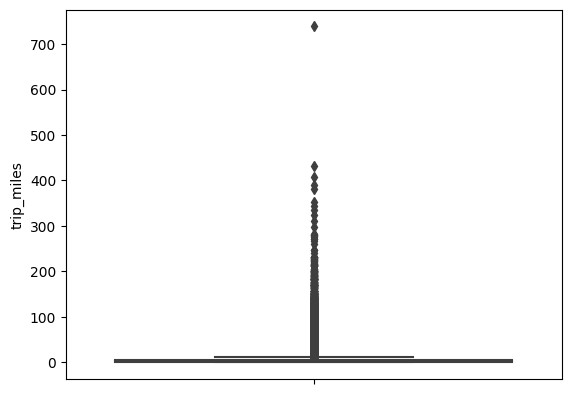

In [28]:
sns.boxplot(data = tlc_21_01, y="trip_miles");

Se observan numerosos outliers por este método. Quedará determinar si corresponde a errores o es debido a la dispersión de los datos. La superficie de NYC es de aproximadamente 468 millas cuadradas.

## trip_time

In [29]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_time.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [30]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.trip_time.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     9.542893e+02
std      6.240636e+02
min      0.000000e+00
25%      5.240000e+02
50%      8.040000e+02
75%      1.216000e+03
max      5.914300e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     1.010675e+03
std      6.719515e+02
min      0.000000e+00
25%      5.480000e+02
50%      8.460000e+02
75%      1.288000e+03
max      7.554000e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     1.033777e+03
std      7.003532e+02
min      0.000000e+00
25%      5.530000e+02
50%      8.600000e+02
75%      1.319000e+03
max      7.711500e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     1.065728e+03
std      7.377095e+02
min      0.000000e+00
25%      5.630000e+02
50%      8.780000e+02
75%      1.356000e+03
max      8.437800e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    

Tiempos de viaje de 0 segundos podrían ser errores. Veamos algunos casos.

In [31]:
tlc_21_01[tlc_21_01.trip_time == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
376082,HV0004,B02800,None,2021-01-01 21:48:43,NaT,2021-01-01 21:49:22,2021-01-01 21:49:22,170,232,0.0,0,1.23,0.0,NaN,0.0,0.0,N,N,N,N,N
434361,HV0004,B02800,None,2021-01-02 02:52:22,NaT,2021-01-02 03:07:56,2021-01-02 03:07:57,140,140,0.0,0,0.67,0.0,NaN,0.0,0.0,N,N,N,N,N
579394,HV0004,B02800,None,2021-01-02 15:47:48,NaT,2021-01-02 15:55:03,2021-01-02 15:55:03,132,107,0.0,0,3.98,0.0,NaN,0.0,0.0,N,N,N,N,N
850561,HV0004,B02800,None,2021-01-03 12:57:00,NaT,2021-01-03 12:59:27,2021-01-03 12:59:28,263,112,0.0,0,1.85,0.0,NaN,0.0,0.0,N,N,N,N,N
1777354,HV0004,B02800,None,2021-01-06 09:55:47,NaT,2021-01-06 09:56:39,2021-01-06 09:56:40,162,263,0.0,0,1.13,0.0,NaN,0.0,0.0,N,N,N,N,N


Observamos casos donde el pickup_time coincide con el dropoff_time o difieren por pocos segundos, por lo que es factible que se trate de errores. Hagamos un análisis preliminar de outliers.

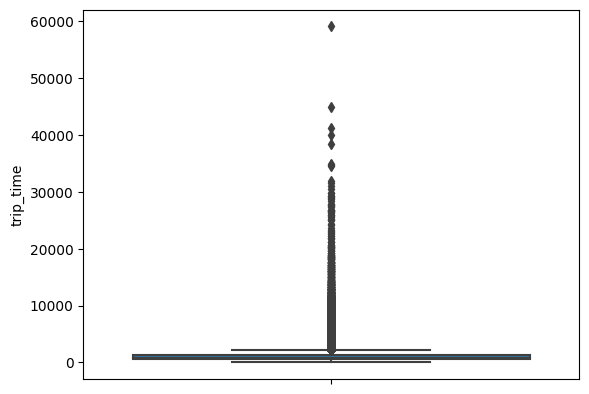

In [32]:
sns.boxplot(data = tlc_21_01, y="trip_time");

También se observan numerosos outliers que corresponderá estudiar.

## base_passenger_fare

In [33]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.base_passenger_fare.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [34]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.base_passenger_fare.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     1.719294e+01
std      1.324411e+01
min     -2.469000e+02
25%      8.700000e+00
50%      1.330000e+01
75%      2.120000e+01
max      1.532670e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     1.911772e+01
std      1.447150e+01
min     -1.315900e+02
25%      9.860000e+00
50%      1.503000e+01
75%      2.354000e+01
max      1.374730e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     1.967572e+01
std      1.484157e+01
min     -1.579200e+02
25%      1.007000e+01
50%      1.549000e+01
75%      2.435000e+01
max      1.507900e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     2.131051e+01
std      1.627672e+01
min     -1.538400e+02
25%      1.090000e+01
50%      1.686000e+01
75%      2.638000e+01
max      2.244710e+03
Name: base_passenger_fare, dtype: float64



Las tarifas negativas probablemente sean errores. Aquellas tarifas en el orden de 10^3, también es posible que sean errores, por alejarse del resto de los cuartilos. Hagamos un análisis preliminar de outliers.

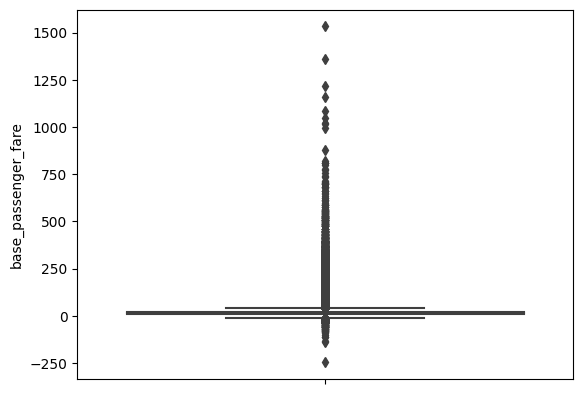

In [35]:
sns.boxplot(data = tlc_21_01, y="base_passenger_fare");

Se observan numerosos outliers por este método, por lo que corresponderá revisar si corresponden a errores en los datos o no.

## tolls

In [36]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.tolls.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [37]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.tolls.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     7.090513e-01
std      2.974593e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.139700e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     7.264736e-01
std      3.060571e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.295900e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     7.896760e-01
std      3.150456e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.064200e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     8.256628e-01
std      3.225815e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.896800e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.471917e+07
mea

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

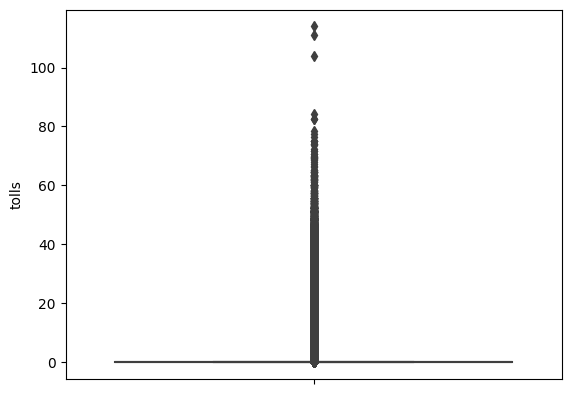

In [38]:
sns.boxplot(data = tlc_21_01, y="tolls");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## bcf

In [39]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.bcf.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [40]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.bcf.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     5.285122e-01
std      4.520942e-01
min      0.000000e+00
25%      2.600000e-01
50%      3.900000e-01
75%      6.400000e-01
max      4.785000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     5.847653e-01
std      4.845095e-01
min      0.000000e+00
25%      2.900000e-01
50%      4.500000e-01
75%      7.100000e-01
max      4.192000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     6.029509e-01
std      4.975391e-01
min      0.000000e+00
25%      2.900000e-01
50%      4.600000e-01
75%      7.400000e-01
max      4.527000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     6.566668e-01
std      5.473369e-01
min      0.000000e+00
25%      3.200000e-01
50%      5.000000e-01
75%      8.000000e-01
max      6.815000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.471917e+07
mean     6.

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

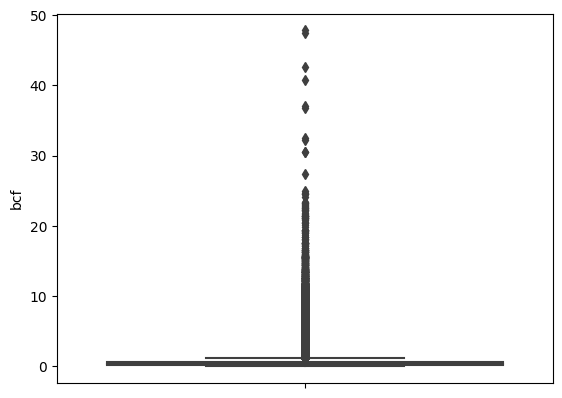

In [41]:
sns.boxplot(data = tlc_21_01, y="bcf");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## sales_tax

In [42]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.sales_tax.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [43]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.sales_tax.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     1.482194e+00
std      1.132610e+00
min      0.000000e+00
25%      7.500000e-01
50%      1.140000e+00
75%      1.850000e+00
max      1.403000e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     1.645351e+00
std      1.239103e+00
min      0.000000e+00
25%      8.400000e-01
50%      1.300000e+00
75%      2.060000e+00
max      1.240100e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     1.689801e+00
std      1.271763e+00
min      0.000000e+00
25%      8.600000e-01
50%      1.330000e+00
75%      2.130000e+00
max      1.085800e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     1.838399e+00
std      1.403786e+00
min      0.000000e+00
25%      9.300000e-01
50%      1.450000e+00
75%      2.310000e+00
max      2.016000e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

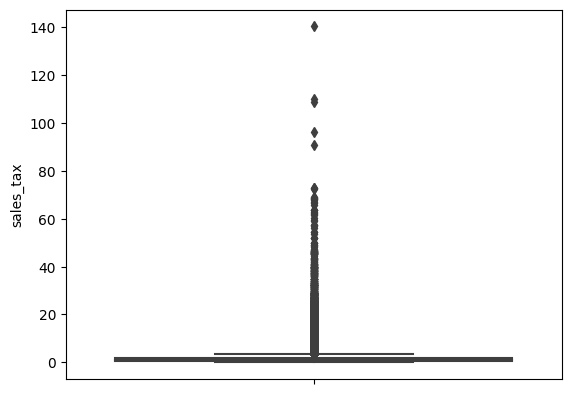

In [44]:
sns.boxplot(data = tlc_21_01, y="sales_tax");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## congestion_surcharge

In [45]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.congestion_surcharge.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [46]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.congestion_surcharge.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     8.669806e-01
std      1.280446e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      5.500000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     9.041739e-01
std      1.311921e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      8.250000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     9.255581e-01
std      1.308273e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      8.250000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     9.805839e-01
std      1.335273e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      5.500000e+00
Name: congestion_surcharge, dtype: float

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

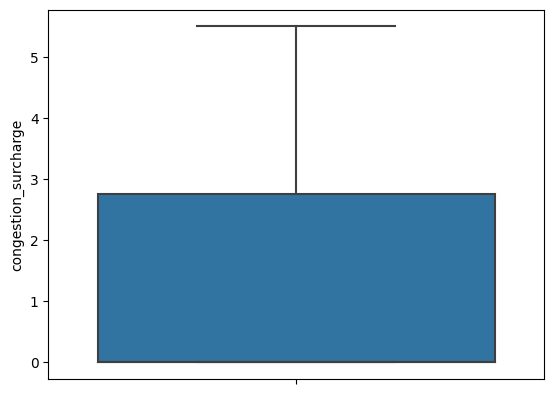

In [47]:
sns.boxplot(data = tlc_21_01, y="congestion_surcharge");

Se observan outliers por encima del bigote superior. No obstante, dado los valores absolutos, no parecen ser errores.

## airport_fee

In [48]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.airport_fee.isna().mean()}")

Promedio de nulos por mes: 0.9995028747610524
Promedio de nulos por mes: 0.9999344753056284
Promedio de nulos por mes: 0.9123672903391367
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


Hay un promedio de nulos de 90% en el periodo enero-marzo de 2021, y luego cae a 0 para el periodo abril-junio 2021.

In [49]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.airport_fee.describe()}\n")

La descripción de cada mes es: count    5920.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    761.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    1246785.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     7.000802e-02
std      4.144559e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.400000e+00
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    1.471917e+07
mean     1.268062e-01
std      5.510235e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

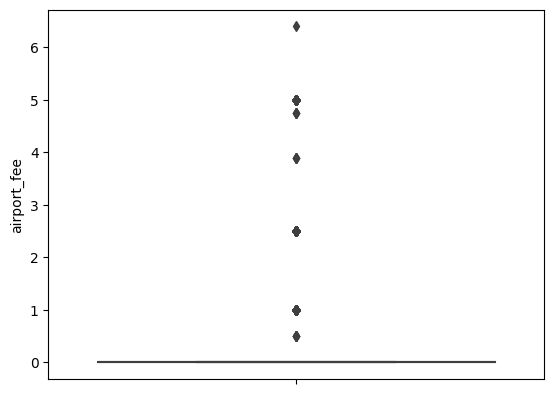

In [51]:
sns.boxplot(data = tlc_21_06, y="airport_fee");

Se observan outliers por encima del bigote superior. No obstante, dado los valores absolutos, no parecen ser errores.

## tips

In [52]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.tips.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [53]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.tips.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     4.997583e-01
std      1.789407e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     5.555536e-01
std      1.957948e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.500000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     5.718826e-01
std      2.011425e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     6.628764e-01
std      2.245735e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.471917e+07
mean   

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

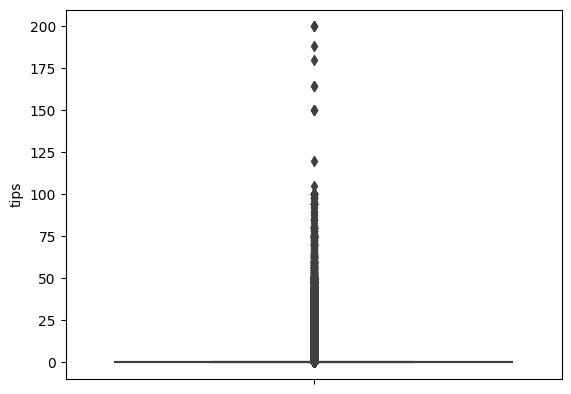

In [54]:
sns.boxplot(data = tlc_21_01, y="tips");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## driver_pay

In [55]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.driver_pay.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [56]:
for df in tlc_21_S1:
    print(f"La descripción de cada mes es: "
          f"{df.driver_pay.describe()}\n")

La descripción de cada mes es: count    1.190847e+07
mean     1.392240e+01
std      1.108822e+01
min     -1.165000e+01
25%      6.680000e+00
50%      1.063000e+01
75%      1.728000e+01
max      1.041770e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.161394e+07
mean     1.576118e+01
std      1.203643e+01
min     -4.686000e+01
25%      7.760000e+00
50%      1.238000e+01
75%      1.985000e+01
max      9.898000e+02
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.422739e+07
mean     1.608288e+01
std      1.222225e+01
min     -2.035920e+03
25%      8.050000e+00
50%      1.270000e+01
75%      2.018000e+01
max      8.725000e+02
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.411137e+07
mean     1.675553e+01
std      1.285646e+01
min     -1.608700e+02
25%      8.370000e+00
50%      1.321000e+01
75%      2.101000e+01
max      1.415730e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count

Los valores negativos es probable que sean errores. Haremos un análisis preliminar de outliers.

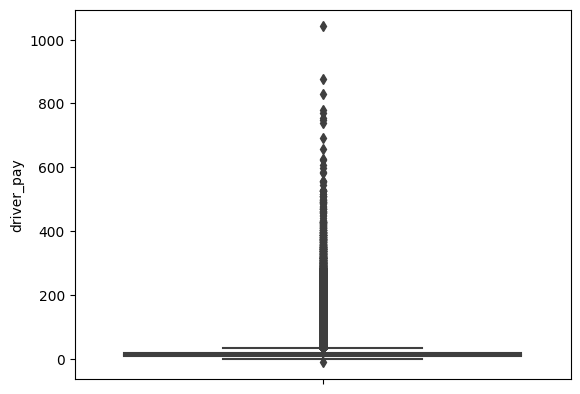

In [57]:
sns.boxplot(data = tlc_21_01, y="driver_pay");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## shared_request_flag

In [58]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [59]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{df.shared_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


Las proporciones de pasajeros que solicitaron compartir viajes fueron:

In [60]:
for df in tlc_21_S1:
    print(df.shared_request_flag.value_counts(normalize=True), "\n")

shared_request_flag
N    0.999494
Y    0.000506
Name: proportion, dtype: float64 

shared_request_flag
N    0.999372
Y    0.000628
Name: proportion, dtype: float64 

shared_request_flag
N    0.999218
Y    0.000782
Name: proportion, dtype: float64 

shared_request_flag
N    0.999143
Y    0.000857
Name: proportion, dtype: float64 

shared_request_flag
N    0.999455
Y    0.000545
Name: proportion, dtype: float64 

shared_request_flag
N    0.999554
Y    0.000446
Name: proportion, dtype: float64 



## shared_match_flag

In [61]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [62]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{df.shared_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [63]:
for df in tlc_21_S1:
    print(df.shared_match_flag.value_counts(normalize=True), "\n")

shared_match_flag
N    0.999899
Y    0.000101
Name: proportion, dtype: float64 

shared_match_flag
N    0.999884
Y    0.000116
Name: proportion, dtype: float64 

shared_match_flag
N    0.999635
Y    0.000365
Name: proportion, dtype: float64 

shared_match_flag
N    0.999498
Y    0.000502
Name: proportion, dtype: float64 

shared_match_flag
N    0.999686
Y    0.000314
Name: proportion, dtype: float64 

shared_match_flag
N    0.99975
Y    0.00025
Name: proportion, dtype: float64 



En todos los meses, menos del 1% de los pasajeros compartieron viajes.

## access_a_ride_flag

In [64]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.access_a_ride_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [65]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{df.access_a_ride_flag.unique()}")

Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']


Según el diccionario de datos, esta columna puede tomar los valores 'Y' o 'N'. La presencia de un string vacio puede hablar de problemas en la calidad de los datos.

## wav_request_flag

In [66]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [67]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{df.wav_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [68]:
for df in tlc_21_S1:
    print(df.wav_request_flag.value_counts(normalize=True), "\n")

wav_request_flag
N    0.998528
Y    0.001472
Name: proportion, dtype: float64 

wav_request_flag
N    0.998531
Y    0.001469
Name: proportion, dtype: float64 

wav_request_flag
N    0.997974
Y    0.002026
Name: proportion, dtype: float64 

wav_request_flag
N    0.998297
Y    0.001703
Name: proportion, dtype: float64 

wav_request_flag
N    0.998493
Y    0.001507
Name: proportion, dtype: float64 

wav_request_flag
N    0.998458
Y    0.001542
Name: proportion, dtype: float64 



En todos los meses, menos del 1% de los pasajeros solicitaron vehículos accesibles para sillas de ruedas.

## wav_match_flag

In [69]:
for df in tlc_21_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [70]:
for df in tlc_21_S1:
    print(f"Los valores únicos por mes: "
          f"{df.wav_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [71]:
for df in tlc_21_S1:
    print(df.wav_match_flag.value_counts(normalize=True), "\n")

wav_match_flag
N    0.951604
Y    0.048396
Name: proportion, dtype: float64 

wav_match_flag
N    0.951279
Y    0.048721
Name: proportion, dtype: float64 

wav_match_flag
N    0.950079
Y    0.049921
Name: proportion, dtype: float64 

wav_match_flag
N    0.948782
Y    0.051218
Name: proportion, dtype: float64 

wav_match_flag
N    0.948374
Y    0.051626
Name: proportion, dtype: float64 

wav_match_flag
N    0.946964
Y    0.053036
Name: proportion, dtype: float64 



En todos los meses, entre el 4 y el 5% de los viajes sucedieron en vehículos accesibles para sillas de ruedas.